# Problem Statement:
Create a K-Means clustering algorithm to group  customer of a retail store  based on their puchase history

# Dataset:
"https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv"

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go


# Data Collection & Analysis

In [2]:
df = pd.read_csv("Customers.csv")
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
39,40,Female,20,37,75
189,190,Female,36,103,85
175,176,Female,30,88,86
120,121,Male,27,67,56
83,84,Female,46,54,44


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Taking out the customer id feature which is not important for the clustering
X = df.iloc[:,2:].values

In [8]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

# Data Visualization

In [9]:
# scatter plot
fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Gender',
    symbol='Gender',
    hover_data=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    title='3D Plot of Age, Income, and Spending Score by Gender',
    opacity=0.85,
    width=1000,
    height=800
)

for trace in fig.data:
    trace.marker.size = 6

fig.update_layout(
    legend=dict(
        x=1.1,
        y=0.95,
        bgcolor='rgba(255,255,255,0.6)',
        bordercolor='gray',
        borderwidth=1
    )
)

fig.show()


# Choosing the number of clusters
WCSS -> Within Clusters Sum of Squares

In [10]:
# Finding wcss value for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

# plot an Elbow Point graph

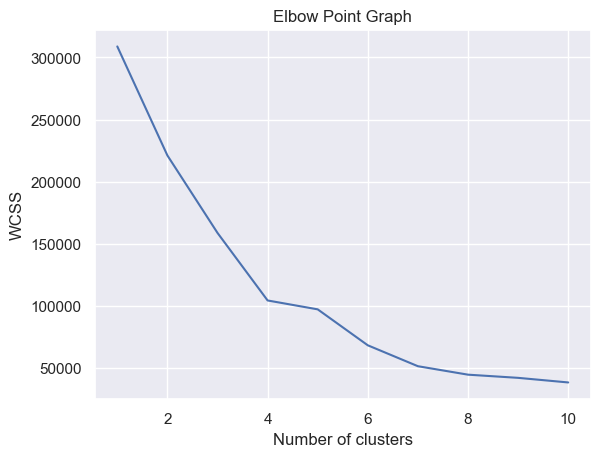

In [11]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Optimum number of clusters = 5

# Training the K-Means clustering Model

In [12]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 0)

# return a label for each data point
Y = kmeans.fit_predict(X)

print(Y)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 4 0 4 4 0 0 0 0
 0 4 4 4 4 0 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 0 0 0
 4 4 4 4 4 0 4 4 4 4 4 4 1 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



# Visualizing Clusters


# Income vs Spending 2D plot

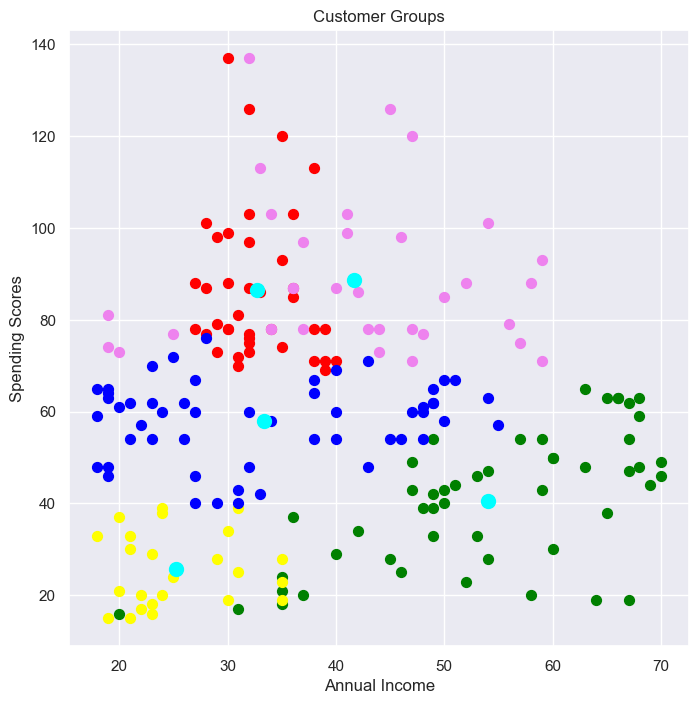

In [13]:
# plot the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores')
plt.show()

# 3D Plot of Cluster

In [14]:

# New DataFrame
df_clusters = pd.DataFrame(X, columns=['Age', 'Annual Income', 'Spending Score'])
df_clusters['Cluster'] = Y
df_clusters['Gender'] = df['Gender'].values

# Main scatter plot
fig = px.scatter_3d(
    df_clusters,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Cluster',
    symbol='Gender',
    hover_data=['Gender'],
    opacity=0.85,
    title='3D Customer Segmentation by Cluster and Gender',
    width=1000,
    height=800
)

# Centroids
centroids = kmeans.cluster_centers_

fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(
            size=10,
            color='black',
            symbol='x',
            line=dict(width=2, color='white')
        ),
        name='Centroids'
    )
)

for trace in fig.data:
    if hasattr(trace, "marker") and hasattr(trace.marker, "colorbar"):
        trace.marker.size = 6
        trace.marker.colorbar.len = 0.4
        trace.marker.colorbar.thickness = 12
        trace.marker.colorbar.x = -0.25

fig.layout.legend = dict(
    x=1.15,
    y=0.95,
    bgcolor='rgba(255,255,255,0.6)',
    bordercolor='gray',
    borderwidth=1
)

fig.show()


# Insights on the clusters

In [15]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns=['Age','Income','SpendScore'])


,Age,Income,SpendScore
0,54.060000,40.460000,36.720000
1,32.692308,86.538462,82.128205
2,25.250000,25.833333,76.916667
3,41.647059,88.735294,16.764706
4,33.396226,58.056604,48.773585


# Model Interpretation

Cluster 0. Older, low income & low spenders.


Cluster 1. Mid-age, average income & spend.


Cluster 2. Young, low income, high spend.


Cluster 3. Mid-age, high-income but cautious and low spend.


Cluster 4. Premium Category, high income & high spend.
